# Cell segmentation


This part shows how to use the function of cell segmentation. We provide two models for cell segmentation, deep cell model and the deep learning model developed by ourselves.


##  Deep learning model

First, download the [model](https://pan.genomics.cn/ucdisk/s/vm6JNz) from our cloud disk. 

It is assumed that the local storage path is `'./seg_model_20211210.pth'`. 

Besides, if you want to use GPU for prediction, set the GPU id by the parameter `gpu`, if not, CPU will be used defaultly.

In [5]:
from stereo import image as im

model_path = './seg_model_20211210.pth'
img_path = './20210426-T173-Z3-L-M019-01_regist_21635_18385_9064_13184.tif'
out_path = './stereopy/'

im.cell_seg(model_path, img_path, out_path)

256 256
【image 1/1】


## Deep cell model

Similarly download the [deep cell model](https://pan.genomics.cn/ucdisk/s/6JFbIr) from our cloud disk. 

It is assumed that the local storage path is `'./models/deepcell/'`.

In [24]:
model_dir = './models/deepcell/'
out_path = './deepcell/'

im.cell_seg_deepcell(model_dir, img_path, out_path)


【image 1/1】 batch:[>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>]100%	1/1


After running the function, three result pictures will be generated in the out path directory.

- _mask.tif: cell segmentation result

- _outline.tif: cell boundary result

- _score.tif: cell fraction result

Display the cell segmentation result:

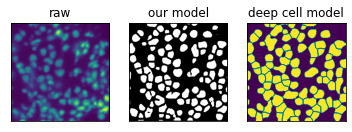

In [29]:
# %matplotlib inline

import matplotlib.pyplot as plt


_, axes = plt.subplots(1, 3)
im = plt.imread('./20210426-T173-Z3-L-M019-01_regist_21635_18385_9064_13184.tif')
axes[0].imshow(im)
_ = axes[0].set_title("raw")
axes[0].set_yticks([])
axes[0].set_xticks([])

im = plt.imread('./20210426-T173-Z3-L-M019-01_regist_21635_18385_9064_13184_mask.tif')
axes[1].imshow(im)
_ = axes[1].set_title("our model")
axes[1].set_yticks([])
axes[1].set_xticks([])

im = plt.imread('./20210426-T173-Z3-L-M019-01_regist_21635_18385_9064_13184_mask.tif')
axes[2].imshow(im)
_ = axes[2].set_title("deep cell model")
axes[2].set_yticks([])
_ = axes[2].set_xticks([])

## Generate cell bin GEF

After generating mask results through cell segmentation function, we can generate a cell bin GEF from the mask as well as the corresponding BGEF (including `SN.raw.gef`, `SN.gef`, `SN.tissue.gef`).

First, you need a BGEF , then refer to following example. Remember to specify the path of directory to save cell bin GEF by `cgef_out_dir`, the path of BGEF by `bgef_path` and the path of mask by `mask_path`.

It will return the path of cell bin GEF.

In [ ]:
from stereo.tools.cell_cut import CellCut

cgef_out_dir = "./cell_cut_out"
bgef_path = "../test_data/SS200000135TL_D1.raw.gef"
mask_path = "../test_data/SS200000135TL_D1_regist.tif"

cc = CellCut(cgef_out_dir=cgef_out_dir)
out_path = cc.cell_cut(bgef_path=bgef_path, mask_path=mask_path)

If only have GEM file, you could generate a new cell bin GEF based on it and the corresponding mask.

In [ ]:
from stereo.tools.cell_cut import CellCut

cgef_out_dir = "./cell_cut_out"
gem_path = "./SS200000135TL_D1.cellbin.gem"
mask_path = "./SS200000135TL_D1_regist.tif"

cc = CellCut(cgef_out_dir=cgef_out_dir)
out_path = cc.cell_cut(gem_path=gem_path, mask_path=mask_path)